# File structure

This project assumes the following initial file structure:

```
.\main                               
|   dataset_metadata.md              
|   Preliminary data analysis.ipynb  
|   tree.txt                         
|                                    
\---data                             
    \---olympic_sw_1896_2022         
            olympic_athletes.csv     
            olympic_hosts.csv        
            olympic_medals.csv       
            olympic_results.csv      
            olympic_results.pkl      
```

# Modules

## Imports

In [1]:
import os
import types

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pkg_resources
import seaborn as sns

## Versions

The current module versions in use are as follows:

In [2]:
def get_imports():
    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            name = val.__name__.split(".")[0]

        elif isinstance(val, type):
            name = val.__module__.split(".")[0]

        poorly_named_packages = {"PIL": "pillow", "sklearn": "scikit-learn"}
        if name in poorly_named_packages.keys():
            name = poorly_named_packages[name]

        yield name


imports = list(set(get_imports()))

requirements = []
for m in pkg_resources.working_set:
    if m.project_name in imports and m.project_name != "pip":
        requirements.append((m.project_name, m.version))

pd.DataFrame(requirements, columns=["Module", "Version"])

,Module,Version
0,matplotlib,3.8.4
1,numpy,1.26.4
2,pandas,2.2.2
3,seaborn,0.13.2


# Global variables

The following global variables are used throughout the entirety of the methodology section.

In [3]:
DATA_PATH = "./data"
OLYMPIC_DATA_PATH = os.path.join(DATA_PATH, "olympic_sw_1896_2022")

# Preliminary data analysis

In this section, we embark on a foundational exploration of our dataset to glean essential insights that underpin our research objectives. We outline the dataset's key attributes, including its size, composition, and structure, while examining descriptive statistics to uncover central tendencies and distributions.

## Data import

In [4]:
athletesData = pd.read_csv(os.path.join(OLYMPIC_DATA_PATH, "olympic_athletes.csv"))
medalsData = pd.read_csv(os.path.join(OLYMPIC_DATA_PATH, "olympic_medals.csv"))
hostsData = pd.read_csv(os.path.join(OLYMPIC_DATA_PATH, "olympic_hosts.csv"))
resultsData = pd.read_csv(os.path.join(OLYMPIC_DATA_PATH, "olympic_results.csv"))

## Visualization

### Athletes

In [5]:
athletesData.head()

,athlete_url,athlete_full_name,games_participations,first_game,athlete_year_birth,athlete_medals,bio
0,https://olympics.com/en/athletes/cooper-woods-...,Cooper WOODS-TOPALOVIC,1,Beijing 2022,2000.0,NaN,NaN
1,https://olympics.com/en/athletes/elofsson,Felix ELOFSSON,2,PyeongChang 2018,1995.0,NaN,NaN
2,https://olympics.com/en/athletes/dylan-walczyk,Dylan WALCZYK,1,Beijing 2022,1993.0,NaN,NaN
3,https://olympics.com/en/athletes/olli-penttala,Olli PENTTALA,1,Beijing 2022,1995.0,NaN,NaN
4,https://olympics.com/en/athletes/reikherd,Dmitriy REIKHERD,1,Beijing 2022,1989.0,NaN,NaN


In [6]:
athletesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75904 entries, 0 to 75903
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   athlete_url           75904 non-null  object 
 1   athlete_full_name     75904 non-null  object 
 2   games_participations  75904 non-null  int64  
 3   first_game            75882 non-null  object 
 4   athlete_year_birth    73448 non-null  float64
 5   athlete_medals        15352 non-null  object 
 6   bio                   22842 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 4.1+ MB


In [7]:
athletesData.describe(include=np.number)

,games_participations,athlete_year_birth
count,75904.000000,73448.000000
mean,1.535874,1961.619377
std,0.854563,28.129576
min,0.000000,1836.000000
25%,1.000000,1946.000000
50%,1.000000,1968.000000
75%,2.000000,1983.000000
max,10.000000,2009.000000


In [8]:
athletesData.describe(include=object)

,athlete_url,athlete_full_name,first_game,athlete_medals,bio
count,75904,75904,75882,15352,22842
unique,75900,75480,53,170,22530
top,https://olympics.com/en/athletes/mariana-pajon,Ivan IVANOV,Rio 2016,\n\n\n1\n\nB\n\n,\n\n\nPersonal Best: Mar – unknown.\n\n\n\n\n\n
freq,2,4,4111,4209,110


In [9]:
athletesData.head(10)

,athlete_url,athlete_full_name,games_participations,first_game,athlete_year_birth,athlete_medals,bio
0,https://olympics.com/en/athletes/cooper-woods-...,Cooper WOODS-TOPALOVIC,1,Beijing 2022,2000.0,NaN,NaN
1,https://olympics.com/en/athletes/elofsson,Felix ELOFSSON,2,PyeongChang 2018,1995.0,NaN,NaN
2,https://olympics.com/en/athletes/dylan-walczyk,Dylan WALCZYK,1,Beijing 2022,1993.0,NaN,NaN
3,https://olympics.com/en/athletes/olli-penttala,Olli PENTTALA,1,Beijing 2022,1995.0,NaN,NaN
4,https://olympics.com/en/athletes/reikherd,Dmitriy REIKHERD,1,Beijing 2022,1989.0,NaN,NaN
5,https://olympics.com/en/athletes/matt-graham,Matt GRAHAM,3,Sochi 2014,1994.0,\n\n\n1\n\nS\n\n,NaN
6,https://olympics.com/en/athletes/ikuma-horishima,Ikuma HORISHIMA,2,PyeongChang 2018,1997.0,\n\n\n1\n\nB\n\n,NaN
7,https://olympics.com/en/athletes/daichi-hara,Daichi HARA,2,PyeongChang 2018,1997.0,\n\n\n1\n\nB\n\n,NaN
8,https://olympics.com/en/athletes/laurent-dumais,Laurent DUMAIS,1,Beijing 2022,1996.0,NaN,NaN
9,https://olympics.com/en/athletes/james-matheson,James MATHESON,2,PyeongChang 2018,1995.0,NaN,NaN


The following code converts the `athlete_year_birth` column to the `Int64` data type, which is a pandas-specific integer type that supports nullable values. This ensures that the column contains integer values while allowing for `NaN` entries, providing better consistency for numerical operations involving birth years.

In [10]:
athletesData["athlete_year_birth"] = athletesData["athlete_year_birth"].astype("Int64")

The following code extracts information from the `first_game` column into two new columns, `first_game_host_city` and `first_game_year`, using a regular expression. The `.str.extract()` method is used with the regex pattern `r"^(.+?)\s(\d+?)$"` to capture the host city and the year separately. The pattern `^(.+?)\s(\d+?)$` matches the city name (which can contain spaces) followed by a space and a four-digit year, ensuring that both parts are properly captured. This allows us to split the `first_game` data into distinct columns for easier analysis.

In [11]:
athletesData[["first_game_city", "first_game_year"]] = athletesData[
    "first_game"
].str.extract(r"^(.+?)\s(\d+?)$")

In [12]:
athletesData["first_game_year"] = athletesData["first_game_year"].astype("Int64")

The following code extracts medal information from the `athlete_medals` column, converts it into structured medal counts, and stores these in new columns. First, the regex `.str.findall()` is used to extract medal pairs (number and type) from each string into the `medal_tuples` column. Next, a helper function `count_medals()` is defined to count specific medal types (`G`, `S`, `B`) in each list of tuples. This function is applied to create `bronze_count`, `silver_count`, and `gold_count` columns, representing the count of each medal type. Finally, a `total_medals` column is created by calculating the sum of the three newly created columns.

In [13]:
athletesData["medal_tuples"] = athletesData["athlete_medals"].str.findall(
    r"\n*(\d+)\n*([GSB])\n*"
)

In [14]:
def count_medals(medal_list, medal_type):
    if not isinstance(medal_list, list):
        return 0
    return sum(int(count) for count, medal in medal_list if medal == medal_type)


medal_types = ["B", "S", "G"]
athletesData["bronze_count"] = athletesData["medal_tuples"].apply(
    lambda x: count_medals(x, medal_types[0])
)
athletesData["silver_count"] = athletesData["medal_tuples"].apply(
    lambda x: count_medals(x, medal_types[1])
)
athletesData["gold_count"] = athletesData["medal_tuples"].apply(
    lambda x: count_medals(x, medal_types[2])
)

athletesData["total_medals"] = athletesData[
    ["bronze_count", "silver_count", "gold_count"]
].sum(axis=1)

Here, we remove information that is not pertinent for the present analysis.

In [15]:
athletesData = athletesData.drop(
    ["athlete_url", "bio", "athlete_medals", "medal_tuples"], axis=1
)

Finally, we visualize the first entries of the cleaned data.

In [16]:
athletesData.head(10)

,athlete_full_name,games_participations,first_game,athlete_year_birth,first_game_city,first_game_year,bronze_count,silver_count,gold_count,total_medals
0,Cooper WOODS-TOPALOVIC,1,Beijing 2022,2000,Beijing,2022,0,0,0,0
1,Felix ELOFSSON,2,PyeongChang 2018,1995,PyeongChang,2018,0,0,0,0
2,Dylan WALCZYK,1,Beijing 2022,1993,Beijing,2022,0,0,0,0
3,Olli PENTTALA,1,Beijing 2022,1995,Beijing,2022,0,0,0,0
4,Dmitriy REIKHERD,1,Beijing 2022,1989,Beijing,2022,0,0,0,0
5,Matt GRAHAM,3,Sochi 2014,1994,Sochi,2014,0,1,0,1
6,Ikuma HORISHIMA,2,PyeongChang 2018,1997,PyeongChang,2018,1,0,0,1
7,Daichi HARA,2,PyeongChang 2018,1997,PyeongChang,2018,1,0,0,1
8,Laurent DUMAIS,1,Beijing 2022,1996,Beijing,2022,0,0,0,0
9,James MATHESON,2,PyeongChang 2018,1995,PyeongChang,2018,0,0,0,0


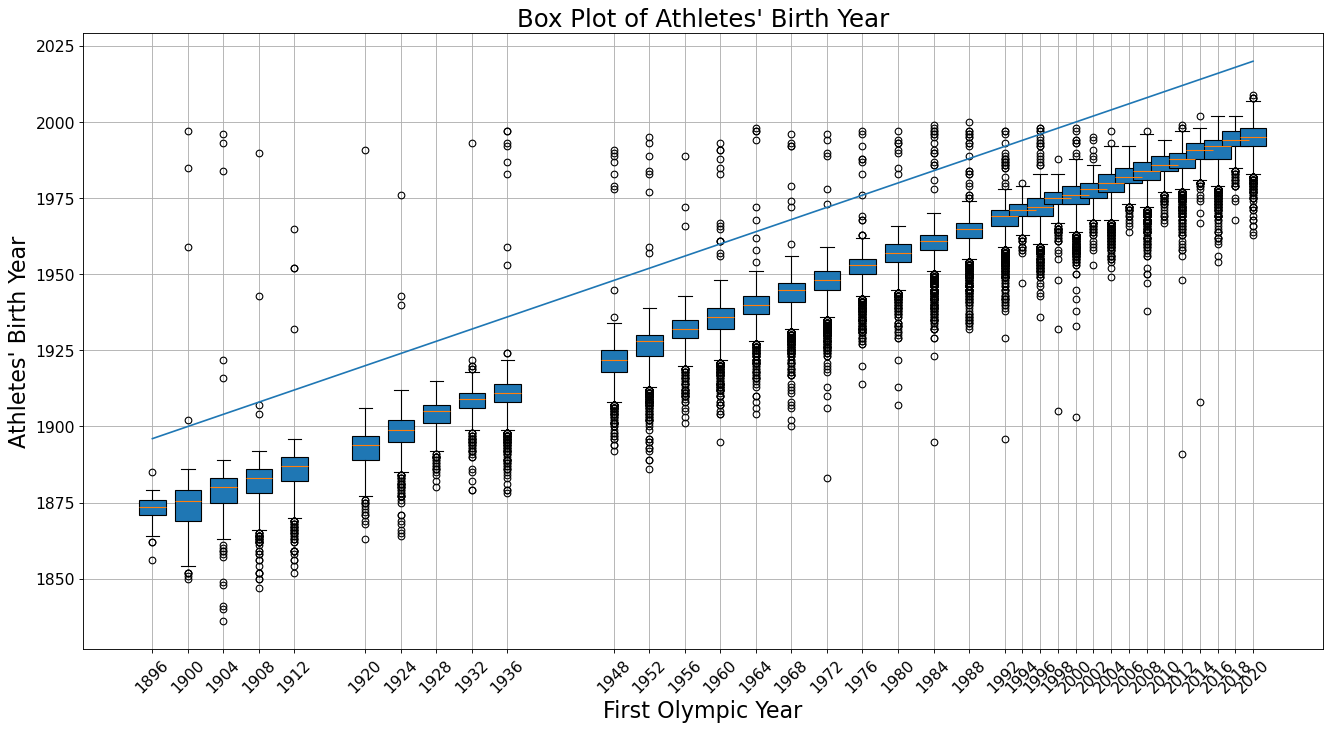

In [17]:
plt.figure(figsize=(20, 10), dpi=80)

game_years = pd.unique(athletesData["first_game_year"].sort_values(ascending=True))[:-2]

box_data = []
for game_year in game_years:
    year_births = athletesData[athletesData["first_game_year"] == game_year]["athlete_year_birth"]
    box_data.append(year_births[~year_births.isna()])

plt.boxplot(box_data, positions=game_years, widths = [3]*len(game_years), patch_artist=True)

plt.plot(game_years, game_years)

# Decoration
plt.title("Box Plot of Athletes' Birth Year", fontsize=22)
plt.xlabel("First Olympic Year", fontsize=20)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel("Athletes' Birth Year", fontsize=20)
plt.grid()
plt.show()

In [18]:
athletesData[athletesData["first_game_year"] < athletesData["athlete_year_birth"]]

,athlete_full_name,games_participations,first_game,athlete_year_birth,first_game_city,first_game_year,bronze_count,silver_count,gold_count,total_medals
1008,Anna MAKA,2,Grenoble 1968,1992,Grenoble,1968,0,0,0,0
1134,James CRAWFORD,2,Berlin 1936,1997,Berlin,1936,1,0,0,1
1619,Timo Juhani GRONLUND,5,Montreal 1976,1987,Montreal,1976,0,0,0,0
1635,Janez LAMPIC,2,Los Angeles 1984,1996,Los Angeles,1984,0,0,0,0
1848,Espen ANDERSEN,2,Sarajevo 1984,1993,Sarajevo,1984,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
68872,Jerzy KOWALSKI,2,Rome 1960,1988,Rome,1960,0,0,0,0
72700,Kang CHEN,1,Barcelona 1992,1993,Barcelona,1992,0,0,0,0
73121,Petar BOZHILOV,1,Seoul 1988,2000,Seoul,1988,0,0,0,0
73910,Geoff WALKER,2,Moscow 1980,1985,Moscow,1980,1,0,0,1
